<a href="https://colab.research.google.com/github/amityu/BigData/blob/main/Copy_of_HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment  5

**Question 1:** Select a directed network, and develop a simple
    link prediction classifier based on the network's directed topology (40pt). 
    Use node or link embedding features and try to improve the classification (20pt)
    
**Bonus:** Evaluate the classifier's ability to predict future links (10pt)
    
** Note:** You can use [Reddit community networks](http://dynamics.cs.washington.edu/data.html), or search
for networks using [The Colorado Index of Complex Networks](https://icon.colorado.edu/).

In [ ]:
!mkdir ./datasets


mkdir: cannot create directory ‘./datasets’: File exists


In [ ]:
!pip install turicreate

     |████████████████████████████████| 92.0 MB 14 kB/s 
     |████████████████████████████████| 3.6 MB 45.7 MB/s 
     |████████████████████████████████| 322 kB 44.3 MB/s 
     |████████████████████████████████| 3.5 MB 18.1 MB/s 
     |████████████████████████████████| 86.4 MB 61 kB/s 
     |████████████████████████████████| 18.3 MB 1.7 MB/s 
     |████████████████████████████████| 449 kB 42.3 MB/s 
     |████████████████████████████████| 20.1 MB 13.0 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 3.8 MB 39.3 MB/s 
     |████████████████████████████████| 2.9 MB 43.9 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=a915d61a5afb9232b8b909a982b55128db0c578b2b85c1352f765dfa0e62e8ce
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320859 sha256=794b36ef3a

In [ ]:
import networkx as nx
import turicreate as tc
!wget https://s3.amazonaws.com/connectome-graphs/cat/mixed.species_brain_1.graphml -O ./datasets/mixed.species_brain_1.graphml
g =nx.read_graphml('./datasets/mixed.species_brain_1.graphml')
print(nx.info(g))

nx.write_gexf(g, "./datasets/brain.gexf")
#nx.draw(g)


--2022-04-11 09:34:55--  https://s3.amazonaws.com/connectome-graphs/cat/mixed.species_brain_1.graphml
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.49.62
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.49.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58516 (57K) [binary/octet-stream]
Saving to: ‘./datasets/mixed.species_brain_1.graphml’

./datasets/mixed.sp 100%[===================>]  57.14K   340KB/s    in 0.2s    

2022-04-11 09:34:56 (340 KB/s) - ‘./datasets/mixed.species_brain_1.graphml’ saved [58516/58516]

DiGraph with 65 nodes and 1139 edges


In [ ]:
import turicreate as tc
import numpy as np
def common_friends(g,u,v):
    if not g.has_node(u) or not g.has_node(v):
        return None
    return set(g.neighbors(u)) & set(g.neighbors(v))
import operator
def find_friends_of_friends(g, v):
    "Returns a set with all the friends of friends of v that are not friends of v"
    friends_set = set(g.neighbors(v))
    friends_of_friends_set = set()
    for f in friends_set:
        friends_of_friends_set |= set(g.neighbors(f))
    friends_of_friends_set -= friends_set
    friends_of_friends_set -= {v}
    return friends_of_friends_set


def rank_friends_of_friends(g, v):
    rank_dict = {}
    vertices_set = find_friends_of_friends(g, v)
    for u in vertices_set:
        rank_dict[u] = len(common_friends(g, v, u))
    #3sorted_d = sorted(rank_dict.items(), key=operator.itemgetter(1), reverse=True)
    #return sorted_d
    return rank_dict

#rank_friends_of_friends()
sf = tc.SFrame()
for node in g:
    ranks = rank_friends_of_friends(g,node)
    for out_v in ranks.keys():
        row = {'in_v':[node], 'out_v': [out_v], 'rank':[ranks[out_v]]}
        sf = sf.append(tc.SFrame(data = row))
max_rank = sf['rank'].mean() + sf['rank'].std()*0.5
print(max_rank)
sf['class'] = sf.apply(lambda x:x['rank']>max_rank)
src = [str(x) for (x,y) in g.edges()]
dst =[str(y) for (x,y) in g.edges()]
sf =sf.append(tc.SFrame({'in_v':src, 'out_v': dst, 'rank':np.ones(len(src),dtype=int),'class':np.ones(len(src),dtype=int)}))
sf.print_rows(30)

6.104774070832248
+------+-------+------+-------+
| in_v | out_v | rank | class |
+------+-------+------+-------+
|  n0  |  n40  |  5   |   0   |
|  n0  |  n22  |  0   |   0   |
|  n0  |  n60  |  0   |   0   |
|  n0  |   n6  |  4   |   0   |
|  n0  |  n14  |  7   |   1   |
|  n0  |  n41  |  2   |   0   |
|  n0  |  n50  |  3   |   0   |
|  n0  |  n51  |  3   |   0   |
|  n0  |  n52  |  3   |   0   |
|  n0  |  n15  |  3   |   0   |
|  n0  |   n7  |  6   |   0   |
|  n0  |  n42  |  7   |   1   |
|  n0  |  n61  |  0   |   0   |
|  n0  |  n36  |  3   |   0   |
|  n0  |  n64  |  0   |   0   |
|  n0  |  n38  |  0   |   0   |
|  n0  |  n48  |  1   |   0   |
|  n0  |   n8  |  3   |   0   |
|  n0  |  n12  |  3   |   0   |
|  n0  |  n26  |  5   |   0   |
|  n0  |  n16  |  2   |   0   |
|  n0  |  n13  |  2   |   0   |
|  n0  |  n21  |  0   |   0   |
|  n0  |  n53  |  1   |   0   |
|  n0  |  n62  |  0   |   0   |
|  n0  |  n55  |  1   |   0   |
|  n0  |  n47  |  2   |   0   |
|  n0  |  n59  |  3   

In [ ]:

train_set,valid_set = sf.remove_column('rank').random_split(0.7)

model = tc.classifier.create(train_set, validation_set=valid_set, target='class')


PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 2540

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.003546     | 0.580709          | 0.594340            | 0.677059          | 0.682158            |

| 2         | 0.006390     | 0.628346          | 0.618868            | 0.663938          | 0.673385            |

| 3         | 0.010168     | 0.656299          | 0.626415            | 0.652171          | 0.668482            |

| 4         | 0.012960     | 0.660236          | 0.629245            | 0.640587          | 0.658412            |

| 5         | 0.016000     | 0.684646          | 0.643396            | 0.630477          | 0.652197            |

| 10        | 0.039854     | 0.722835          | 0.663208            | 0.587614          | 0.628465            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 2540

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.003804     | 0.574803          | 0.595283            | 0.662834          | 0.675435            |

| 2         | 0.007158     | 0.606299          | 0.618868            | 0.654256          | 0.664430            |

| 3         | 0.010484     | 0.605512          | 0.618868            | 0.653319          | 0.664157            |

| 4         | 0.016238     | 0.605512          | 0.619811            | 0.651950          | 0.662256            |

| 5         | 0.019509     | 0.613780          | 0.627358            | 0.650302          | 0.660692            |

| 10        | 0.041963     | 0.635433          | 0.625472            | 0.649350          | 0.661431            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 2540

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.015110     | 0.580709          | 0.594340            | 0.657083          | 0.674929            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 2540

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients    : 129

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.005909     | 0.784252          | 0.748113            |

| 1         | 8        | 0.618811  | 0.016258     | 0.792520          | 0.750943            |

| 2         | 10       | 0.766843  | 0.034456     | 0.798031          | 0.755660            |

| 3         | 11       | 0.958554  | 0.044461     | 0.746850          | 0.718868            |

| 4         | 13       | 0.434600  | 0.061577     | 0.803543          | 0.764151            |

| 9         | 19       | 0.779511  | 0.087045     | 0.784252          | 0.761321            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 2540

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 129

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.012117     | 0.795669          | 0.743396            |

| 2         | 3        | 0.022035     | 0.793701          | 0.743396            |

| 3         | 4        | 0.033060     | 0.794094          | 0.748113            |

| 4         | 5        | 0.041021     | 0.794094          | 0.748113            |

| 5         | 6        | 0.049830     | 0.794094          | 0.748113            |

| 9         | 10       | 0.085451     | 0.794094          | 0.748113            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.6632075471698113
PROGRESS: RandomForestClassifier          : 0.6254716981132076
PROGRESS: DecisionTreeClassifier          : 0.5943396226415094
PROGRESS: SVMClassifier                   : 0.7613207547169811
PROGRESS: LogisticClassifier              : 0.7481132075471698
PROGRESS: ---------------------------------------------
PROGRESS: Selecting SVMClassifier based on validation set performance.


In [ ]:
!pip install karateclub


     |████████████████████████████████| 62 kB 531 kB/s 
     |████████████████████████████████| 1.8 MB 22.5 MB/s 
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
  Created wheel for karateclub: filename=karateclub-1.2.3-py3-none-any.whl size=97754 sha256=f73aea2a373a69b3a2aea92bbe61bb876c69b8a6c1c2253593eff5c7779065e4
  Stored in directory: /root/.cache/pip/wheels/7a/09/80/0d50455fd4e297e88f8f38a711c6f4849e6bd1a330000dde3d
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149859 sha256=e52675c3a28d810d45ae049b647d6ceff3e7112ba10822c036b329cc20de8cfc
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built karateclub python-Levenshtein
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
l =  zip(g.nodes(), range(len(g.nodes())))
l = list(l)
l[:10]
nodes_dict = dict(l)
r_node_dict = {v:k for k,v in nodes_dict.items()}
list(r_node_dict.items())[:10]
h = nx.DiGraph()
for e1,e2 in g.edges():
  h.add_edge(nodes_dict[e1], nodes_dict[e2])
print(nx.info(g))
print(nx.info(h))

DiGraph with 65 nodes and 1139 edges
DiGraph with 65 nodes and 1139 edges


In [ ]:
import karateclub

model = karateclub.DeepWalk()

model.fit(h)
embedding = model.get_embedding()
embedding

array([[ 0.04342456, -0.35779825, -0.02488151, ...,  0.13921341,
        -0.00553207, -0.08360373],
       [ 0.05939575, -0.42100945, -0.02117867, ...,  0.17904215,
        -0.00107634, -0.08703545],
       [ 0.0726785 , -0.32127833, -0.08016414, ...,  0.09420169,
        -0.03104287, -0.03222221],
       ...,
       [ 0.08099975,  0.21005458, -0.08827299, ..., -0.16905013,
         0.06432527,  0.26549736],
       [ 0.07256632,  0.12786517, -0.07281025, ..., -0.10636756,
         0.04811159,  0.21275268],
       [ 0.09208704,  0.17691678, -0.08069841, ..., -0.15049672,
         0.04752911,  0.2410348 ]], dtype=float32)

In [ ]:
def enter_embedding(row):
  return list(embedding[nodes_dict[row['in_v']]]) +list(embedding[nodes_dict[row['out_v']]])
  
sf['embedding'] = sf.apply(enter_embedding)

  
sf

in_v,out_v,rank,class,embedding
n0,n40,5,0,"[0.04342455789446831,-0.3577982485294342, ..."
n0,n22,0,0,"[0.04342455789446831,-0.3577982485294342, ..."
n0,n60,0,0,"[0.04342455789446831,-0.3577982485294342, ..."
n0,n6,4,0,"[0.04342455789446831,-0.3577982485294342, ..."
n0,n14,7,1,"[0.04342455789446831,-0.3577982485294342, ..."
n0,n41,2,0,"[0.04342455789446831,-0.3577982485294342, ..."
n0,n50,3,0,"[0.04342455789446831,-0.3577982485294342, ..."
n0,n51,3,0,"[0.04342455789446831,-0.3577982485294342, ..."
n0,n52,3,0,"[0.04342455789446831,-0.3577982485294342, ..."
n0,n15,3,0,"[0.04342455789446831,-0.3577982485294342, ..."


In [ ]:
sf = sf.unpack('embedding')
sf

in_v,out_v,rank,class,embedding.0,embedding.1,embedding.2,embedding.3
n0,n40,5,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n22,0,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n60,0,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n6,4,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n14,7,1,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n41,2,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n50,3,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n51,3,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n52,3,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n15,3,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896


In [ ]:
train_set,valid_set = sf.remove_column('rank').random_split(0.7)

model = tc.random_forest_classifier.create(train_set, validation_set=valid_set, metric = "accuracy",target='class')

Random forest classifier:

--------------------------------------------------------

Number of examples          : 2476

Number of classes           : 2

Number of feature columns   : 258

Number of unpacked features : 258

+-----------+--------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+--------------+-------------------+---------------------+

| 1         | 0.051794     | 0.801292          | 0.750890            |

| 2         | 0.093258     | 0.842084          | 0.802491            |

| 3         | 0.132573     | 0.848546          | 0.790036            |

| 4         | 0.172164     | 0.849354          | 0.800712            |

| 5         | 0.215240     | 0.845719          | 0.790036            |

| 10        | 0.397777     | 0.858643          | 0.799822            |

+-----------+--------------+-------------------+---------------------+

In [ ]:
sf

in_v,out_v,rank,class,embedding.0,embedding.1,embedding.2,embedding.3
n0,n40,5,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n22,0,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n60,0,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n6,4,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n14,7,1,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n41,2,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n50,3,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n51,3,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n52,3,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896
n0,n15,3,0,0.04342455789446831,-0.3577982485294342,-0.024881511926651,0.19348105788230896


**Question 2:** Use three different centrality algorithms to identify managers at Enron.
    Evaluate the precision@10 of the algorithms, i.e. how many managers attained the top-10 highest ranks (30pt). Draw
    the network and visualize one of the centrality measures (10pt)


In [ ]:
!mkdir /root/.kaggle/
!pip install kaggle 
!mkdir datasets
import json

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"amyuval","key":"1c309b85bf5a7e1c79a431e672976a28"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json
!ls

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
datasets  sample_data


In [ ]:
!kaggle datasets download wcukierski/enron-email-dataset -p ./datasets --unzip

 99% 353M/358M [00:06<00:00, 56.3MB/s]
100% 358M/358M [00:06<00:00, 56.0MB/s]


In [ ]:
import networkx as nx
import pandas as pd
df = pd.read_csv('./datasets/emails.csv')
df


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...


In [ ]:
g = nx.Graph()
for idx, row in df.iterrows():
  str_list = row['message'].split('\n')
  n1 = str_list[2].split(': ')[1]
  n2 = str_list[3].split(': ')[1]
  g.add_edge(n1,n2)
nx.info(g)

'Graph with 69693 nodes and 96281 edges'

In [ ]:
import operator
x = nx.degree_centrality(g)
sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
sorted_x[:10]

[('jeff.dasovich@enron.com', 0.023460368478448027),
 ('klay@enron.com', 0.018165643115422143),
 ('sara.shackleton@enron.com', 0.01796475922631005),
 ('chris.germany@enron.com', 0.01729036331286231),
 ('tana.jones@enron.com', 0.016673362796303735),
 ('kay.mann@enron.com', 0.01452103541295988),
 ('outlook.team@enron.com', 0.012971359696952305),
 ('vince.kaminski@enron.com', 0.012942661998507719),
 ('gerald.nemec@enron.com', 0.011565172473167651),
 ('d..steffes@enron.com', 0.0105320553291626)]

In [ ]:
import operator
x = nx.pagerank(g)
sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
sorted_x[:10]

[('jeff.dasovich@enron.com', 0.007587417406666499),
 ('klay@enron.com', 0.006623988168408718),
 ('chris.germany@enron.com', 0.005610549996054232),
 ('sara.shackleton@enron.com', 0.00519744966046738),
 ('outlook.team@enron.com', 0.004675784207164437),
 ('tana.jones@enron.com', 0.004650718514748905),
 ('kay.mann@enron.com', 0.004620912798036621),
 ('vince.kaminski@enron.com', 0.003421296678898859),
 ('gerald.nemec@enron.com', 0.003361964940543702),
 ('d..steffes@enron.com', 0.0032947408529496944)]

In [ ]:
import operator
x = nx.eigenvector_centrality(g)
sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
sorted_x[:10]

[('tana.jones@enron.com', 0.22952253891439583),
 ('sara.shackleton@enron.com', 0.2264277138851939),
 ('louise.kitchen@enron.com', 0.18930716159748256),
 ('mark.taylor@enron.com', 0.1737311512590609),
 ('jeff.dasovich@enron.com', 0.1557449109873045),
 ('sally.beck@enron.com', 0.12944439892256646),
 ('mark.haedicke@enron.com', 0.1284356519780413),
 ('elizabeth.sager@enron.com', 0.12767038166556738),
 ('richard.sanders@enron.com', 0.12590030417011866),
 ('vince.kaminski@enron.com', 0.12579800087556628)]

In [18]:

nx.write_gexf(g, "./datasets/enron.gexf")

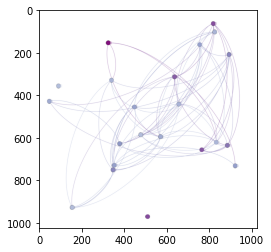

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as img
  
# reading png image file
im = img.imread('enron.png')
  
# show image
plt.imshow(im)